<a href="https://colab.research.google.com/github/chrisdionisius/PCVK/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 30


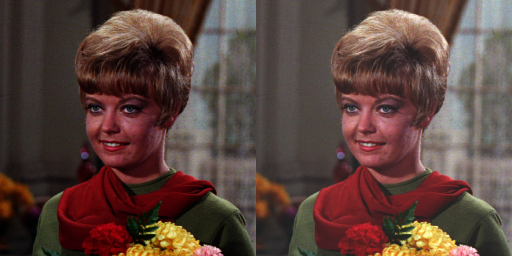

In [10]:
print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple
#brightness_image = cv.cobertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM
1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran
seperti berikut:

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan nilai kecerahan [1.0 - 3.0]: 1.5


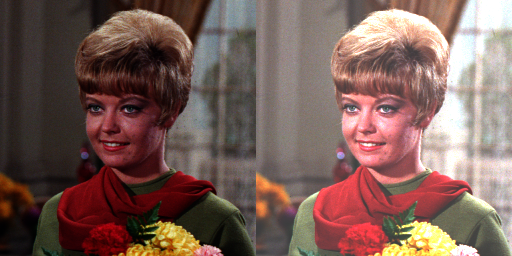

In [21]:
print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan nilai kecerahan [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, -255, 255)

#cara simple
#brightness_image = cv.cobertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga
menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 40


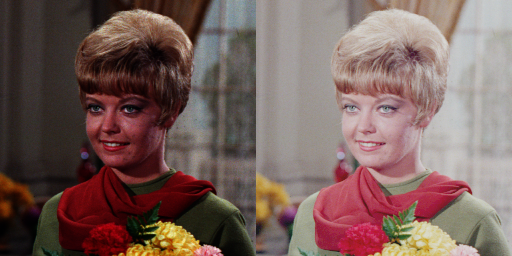

In [19]:
print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*math.log(1+original[y,x,c]), 0, 255)

#cara simple
#brightness_image = cv.cobertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

*   Averaging

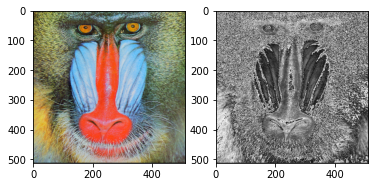

In [71]:
# original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'),cv.COLOR_BGR2RGB)
# image = np.zeros(original.shape, original.dtype)

# #akses per pixel
# for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#     image[y,x] = np.clip((original[y,x][0]+original[y,x][1]+original[y,x][2])/3, 0, 255)

# final_frame = cv.hconcat((original,image))
# plt.imshow(final_frame)

color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'),cv.COLOR_BGR2RGB)
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]

gray_img = (R + G + B)/3

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')



*   Lightness



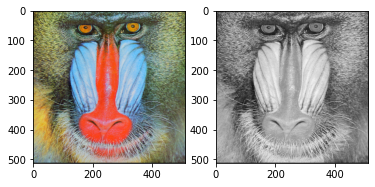

In [69]:
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'),cv.COLOR_BGR2RGB)
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
max_channels = np.maximum(np.maximum(R,G),B)
min_channels = np.minimum(np.minimum(R,G),B)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')



*   Luminance



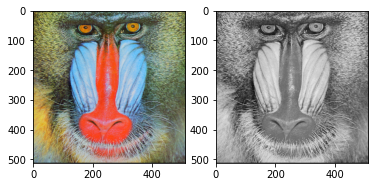

In [70]:
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'),cv.COLOR_BGR2RGB)
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
# max_channels = np.maximum(np.maximum(R,G),B)
# min_channels = np.minimum(np.minimum(R,G),B)

gray_img = (0.21*R) + (0.72*G) + (0.07*B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna
merah menjadi grayscale seperti pada contoh berikut:

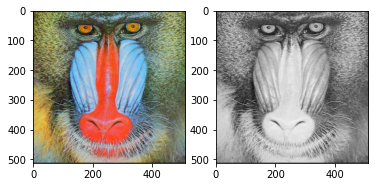

In [81]:
color_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff'),cv.COLOR_BGR2RGB)
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
# max_channels = np.maximum(np.maximum(R,G),B)
# min_channels = np.minimum(np.minimum(R,G),B)

gray_img = (0.21*R) + (0.72*G) + (0.07*B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')